--- [Step 1] EDA Script Started ---
CSV file 'Rohtak_data_60_finalNEW.csv' successfully loaded.

--- Data Preprocessing ---
Preprocessing complete.

--- Exploratory Data Analysis (Showing Graphs) ---
Showing Graph 1: PM2.5 over Time...


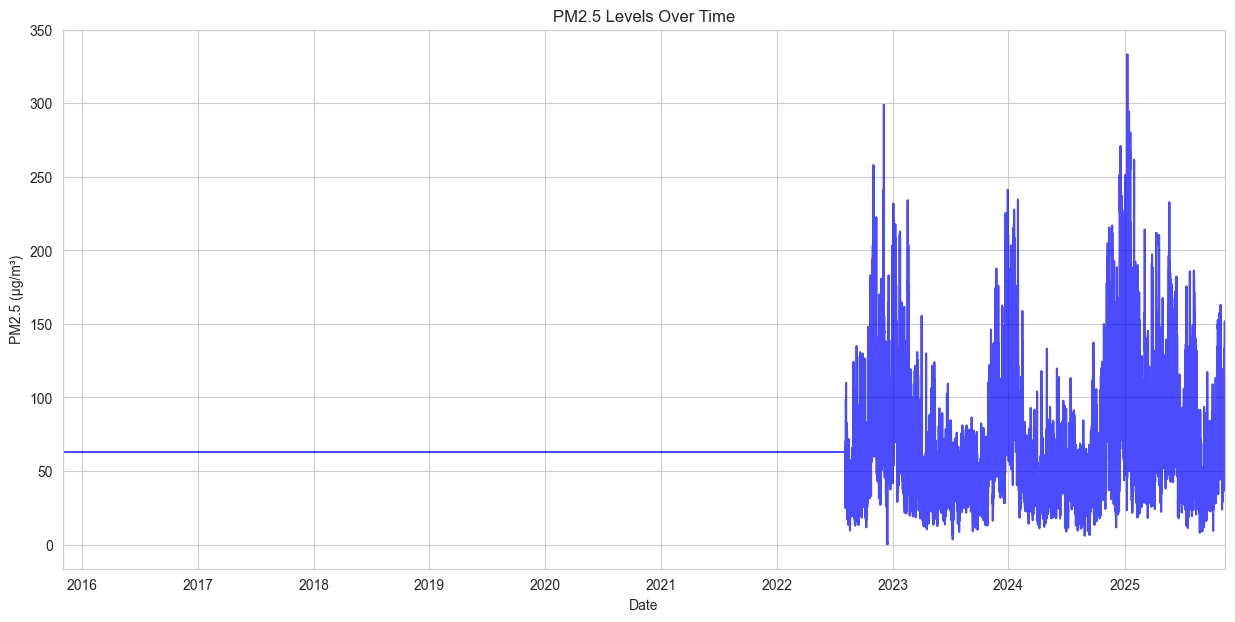

Showing Graph 2: Distribution of PM2.5...


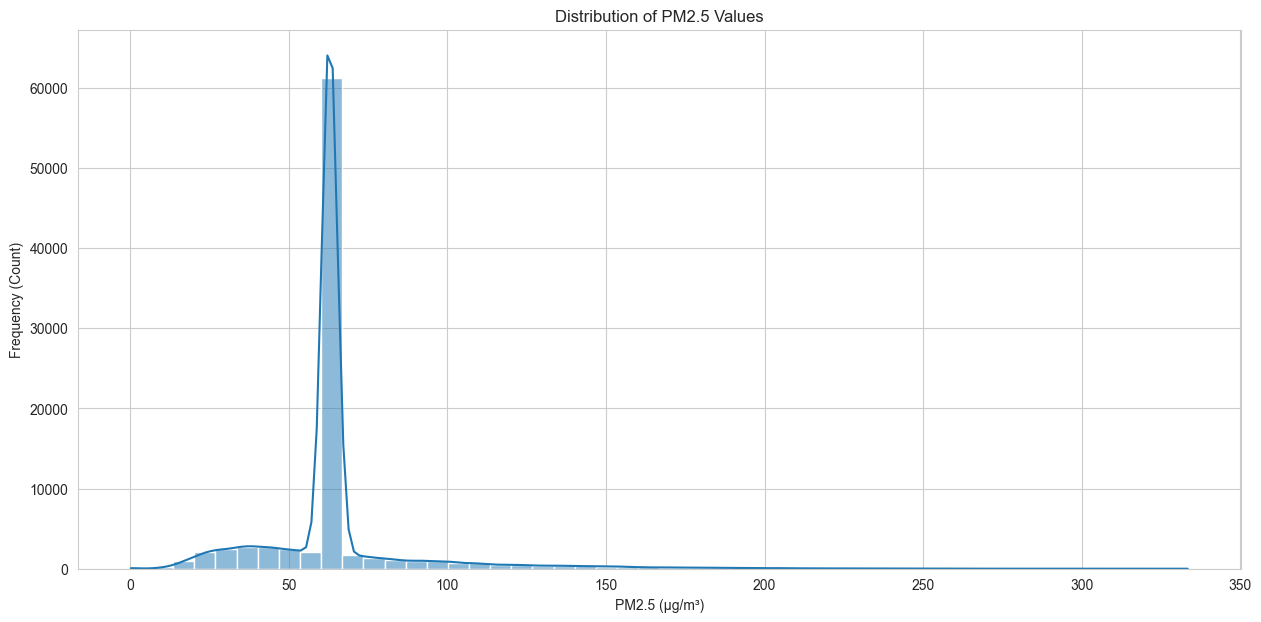

Showing Graph 3: PM2.5 by Month...


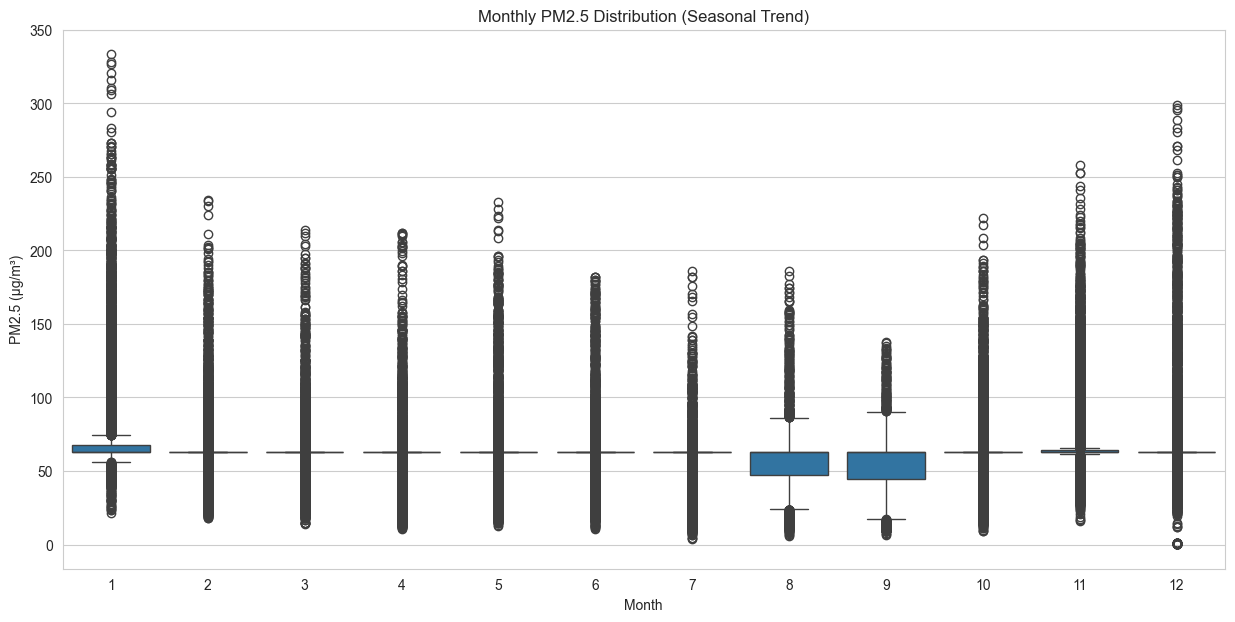

Showing Graph 4: PM2.5 by Hour...


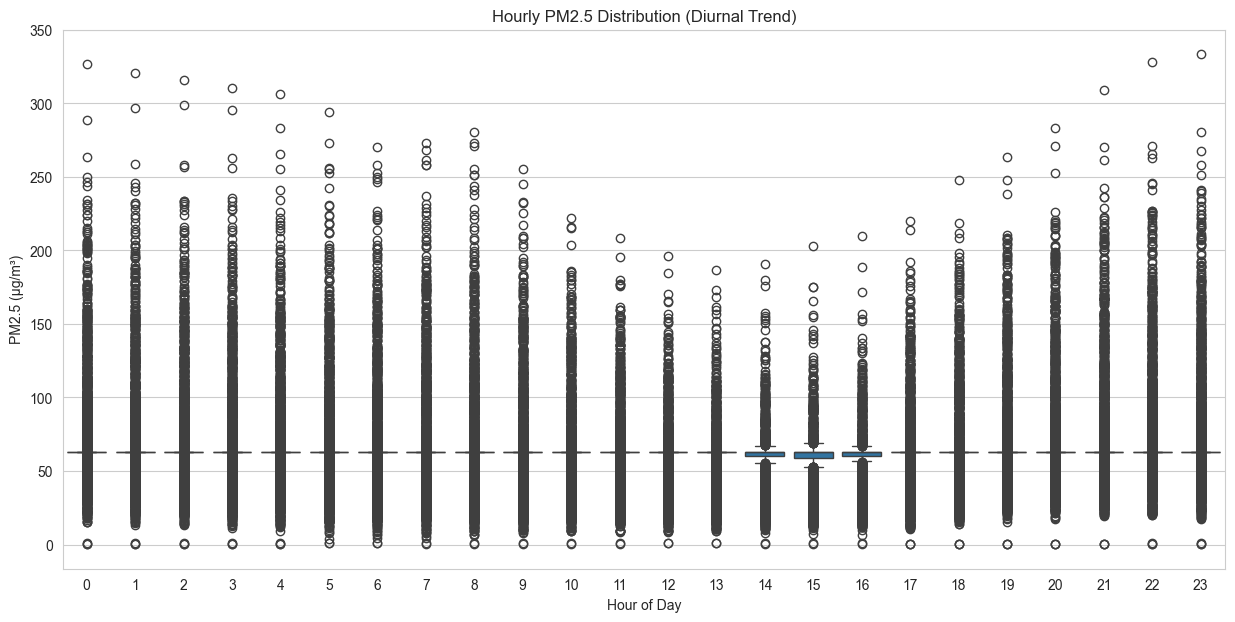


--- Correlation Analysis ---
Top 10 features most correlated with PM2.5:
pm2_5                  1.000000
carbon_monoxide        0.603408
pm10                   0.505770
sulphur_dioxide        0.355059
dust                   0.235755
nitrogen_dioxide       0.212845
pressure_msl           0.210058
surface_pressure       0.198588
relativehumidity_2m    0.174425
month                 -0.020295
hour                  -0.028882
Name: pm2_5, dtype: float64
Showing Graph 5: Correlation Heatmap...


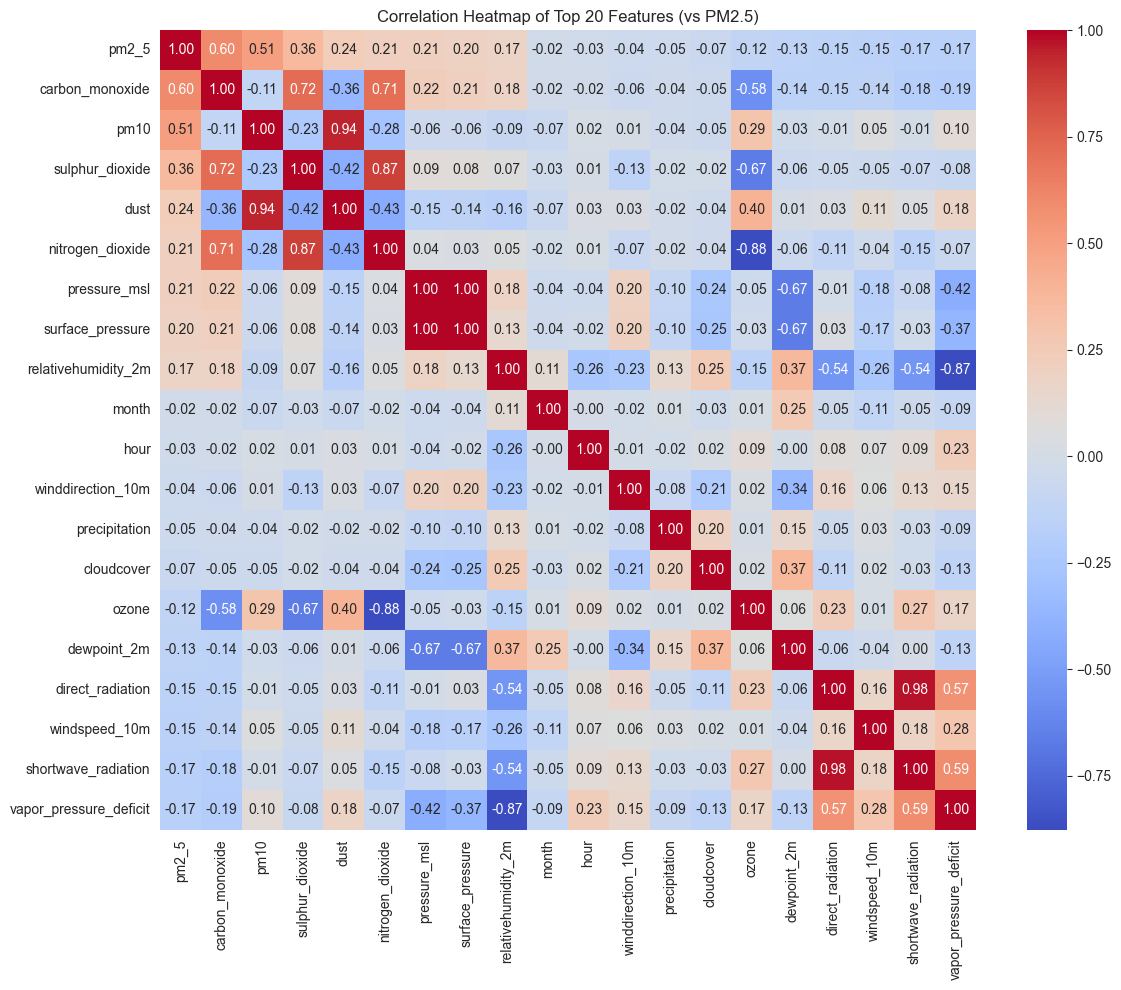


--- [Step 1] EDA Script Finished ---
Saare graphs dikha diye gaye hain.


In [1]:
import pandas as pd
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

print("--- [Step 1] EDA Script Started ---")

# Graph-Defaults set karna
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)
warnings.filterwarnings('ignore', category=UserWarning)

# --- 1. Data Loading ---
try:
    df = pd.read_csv('Rohtak_data_60_finalNEW.csv')
    print("CSV file 'Rohtak_data_60_finalNEW.csv' successfully loaded.")
except FileNotFoundError:
    print("Error: 'Rohtak_data_60_finalNEW.csv' file nahi mili.")
    sys.exit()
except Exception as e:
    print(f"File load karte waqt error: {e}")
    sys.exit()

# --- 2. Data Preprocessing (EDA ke liye) ---
print("\n--- Data Preprocessing ---")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.ffill(inplace=True)
df.bfill(inplace=True)
df.fillna(0, inplace=True)
print("Preprocessing complete.")

# --- 3. Exploratory Data Analysis (Graphs Dikhana) ---
print("\n--- Exploratory Data Analysis (Showing Graphs) ---")

if 'pm2_5' not in df.columns:
    print("Error: 'pm2_5' column zaroori hai EDA ke liye.")
    sys.exit()

# EDA 1: PM2.5 over Time
print("Showing Graph 1: PM2.5 over Time...")
df['pm2_5'].plot(title='PM2.5 Levels Over Time', color='blue', alpha=0.7)
plt.ylabel('PM2.5 (µg/m³)')
plt.xlabel('Date')
plt.show() # <-- Badlaav: Ab graph show hoga

# EDA 2: PM2.5 Distribution (Histogram)
print("Showing Graph 2: Distribution of PM2.5...")
sns.histplot(df['pm2_5'], kde=True, bins=50)
plt.title('Distribution of PM2.5 Values')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency (Count)')
plt.show() # <-- Badlaav: Ab graph show hoga

# EDA 3: Time-based features (Analysis ke liye)
df['month'] = df.index.month
df['hour'] = df.index.hour

# EDA 4: Seasonal Analysis (PM2.5 by Month)
print("Showing Graph 3: PM2.5 by Month...")
sns.boxplot(x='month', y='pm2_5', data=df)
plt.title('Monthly PM2.5 Distribution (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('PM2.5 (µg/m³)')
plt.show() # <-- Badlaav: Ab graph show hoga

# EDA 5: Diurnal Analysis (PM2.5 by Hour)
print("Showing Graph 4: PM2.5 by Hour...")
sns.boxplot(x='hour', y='pm2_5', data=df)
plt.title('Hourly PM2.5 Distribution (Diurnal Trend)')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 (µg/m³)')
plt.show() # <-- Badlaav: Ab graph show hoga

# --- 4. Correlation Analysis ---
print("\n--- Correlation Analysis ---")

# Features list (Correlation ke liye)
selected_features = [
    'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'apparent_temperature',
    'pressure_msl', 'surface_pressure', 'vapor_pressure_deficit', 'precipitation',
    'cloudcover', 'shortwave_radiation', 'direct_radiation', 'diffuse_radiation',
    'windspeed_10m', 'winddirection_10m', 'windgusts_10m', 'et0_fao_evapotranspiration',
    'soil_temperature_0cm', 'soil_moisture_0_1cm', 'visibility', 'cape',
    'month', 'hour', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
    'sulphur_dioxide', 'ozone', 'dust', 'ammonia'
]

available_features = [col for col in selected_features if col in df.columns]
if len(available_features) != len(selected_features):
    print(f"Missing columns: {set(selected_features) - set(available_features)}")

corr_matrix = df[available_features].corr()
target_corr = corr_matrix['pm2_5'].sort_values(ascending=False)

print("Top 10 features most correlated with PM2.5:")
print(target_corr.head(11))

print("Showing Graph 5: Correlation Heatmap...")
top_features = target_corr.index[:20]
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 20 Features (vs PM2.5)')
plt.tight_layout()
plt.show() # <-- Badlaav: Ab graph show hoga

print("\n--- [Step 1] EDA Script Finished ---")
print("Saare graphs dikha diye gaye hain.")

--- [Step 2] PCA Analysis Script Started ---
CSV file successfully loaded.

--- Data Preprocessing ---
Preprocessing complete.

--- Data Scaling ---
Data scaling complete.

--- [Step 2] Running PCA ---

Original number of features: 31
Features after PCA (for 95% variance): 13

Showing Graph: PCA Explained Variance...


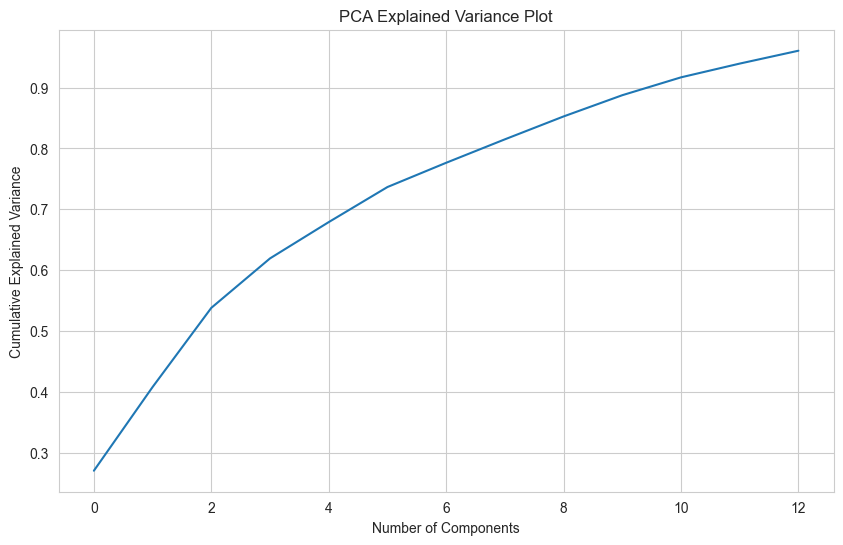


--- Top 5 PCA Components Analysis ---
Yeh batata hai ki har component kin features se bana hai:
  Component 1 is most driven by: ['et0_fao_evapotranspiration', 'temperature_2m', 'vapor_pressure_deficit', 'apparent_temperature', 'diffuse_radiation']
  Component 2 is most driven by: ['dewpoint_2m', 'surface_pressure', 'pressure_msl', 'apparent_temperature', 'direct_radiation']
  Component 3 is most driven by: ['nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 'carbon_monoxide', 'dust']
  Component 4 is most driven by: ['pm10', 'pm2_5', 'dust', 'carbon_monoxide', 'sulphur_dioxide']
  Component 5 is most driven by: ['windspeed_10m', 'diffuse_radiation', 'shortwave_radiation', 'pm2_5', 'relativehumidity_2m']

--- [Step 2] PCA Script Finished ---


In [2]:
import pandas as pd
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("--- [Step 2] PCA Analysis Script Started ---")
warnings.filterwarnings('ignore', category=UserWarning)

# --- 1. Data Loading ---
try:
    df = pd.read_csv('Rohtak_data_60_finalNEW.csv')
    print("CSV file successfully loaded.")
except FileNotFoundError:
    print("Error: 'Rohtak_data_60_finalNEW.csv' file nahi mili.")
    sys.exit()

# --- 2. Data Preprocessing ---
print("\n--- Data Preprocessing ---")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.ffill(inplace=True); df.bfill(inplace=True); df.fillna(0, inplace=True)
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour
print("Preprocessing complete.")

# --- 3. Feature Selection ---
# Features (X) ko define karna
selected_features = [
    'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'apparent_temperature',
    'pressure_msl', 'surface_pressure', 'vapor_pressure_deficit', 'precipitation',
    'cloudcover', 'shortwave_radiation', 'direct_radiation', 'diffuse_radiation',
    'windspeed_10m', 'winddirection_10m', 'windgusts_10m', 'et0_fao_evapotranspiration',
    'soil_temperature_0cm', 'soil_moisture_0_1cm', 'visibility', 'cape',
    'month', 'day_of_week', 'hour',
    'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide',
    'ozone', 'dust', 'ammonia'
]
missing_cols = [col for col in selected_features if col not in df.columns]
if missing_cols:
    print(f"!!! Error: Missing features: {missing_cols}")
    selected_features = [col for col in selected_features if col not in missing_cols]

X = df[selected_features]

# --- 4. Data Scaling (PCA ke liye ZAROORI) ---
print("\n--- Data Scaling ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data scaling complete.")

# --- 5. PCA (Principal Component Analysis) ---
print("\n--- [Step 2] Running PCA ---")
# Hum 95% variance ko capture karna chahte hain
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"\nOriginal number of features: {X_scaled.shape[1]}")
print(f"Features after PCA (for 95% variance): {pca.n_components_}")

# Explained Variance Plot
print("\nShowing Graph: PCA Explained Variance...")
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Plot')
plt.grid(True)
plt.show() # <-- Badlaav: Ab graph show hoga

print("\n--- Top 5 PCA Components Analysis ---")
print("Yeh batata hai ki har component kin features se bana hai:")
for i in range(min(5, pca.n_components_)): # Top 5 ya jitne bane hain
    component = pca.components_[i]
    # Get top 5 features in this component
    top_5_indices = np.argsort(np.abs(component))[-5:][::-1]
    top_5_features = [selected_features[j] for j in top_5_indices]
    print(f"  Component {i+1} is most driven by: {top_5_features}")

print("\n--- [Step 2] PCA Script Finished ---")

--- [Step 3] Naive Bayes Classification (TRAIN) Script Started ---
CSV file successfully loaded.

--- Data Preprocessing ---
Preprocessing complete.

--- Converting Target (y) to Categories ---
Target categories created.

Training set: 70368 samples
Data scaling complete.

--- [Step 3] Training Naive Bayes Classifier ---
Model training complete.

--- Evaluating Naive Bayes (classification) ---

--- Classification Report ---
                precision    recall  f1-score   support

        1_Good       0.44      0.65      0.52      2143
2_Satisfactory       0.42      0.61      0.50      6295
    3_Moderate       0.31      0.01      0.01      4426
        4_Poor       0.25      0.22      0.24      2336
   5_Very_Poor       0.40      0.52      0.45      2350
      6_Severe       0.00      0.00      0.00        42

      accuracy                           0.40     17592
     macro avg       0.30      0.33      0.29     17592
  weighted avg       0.37      0.40      0.34     17592


Showing 

C:\Users\rouna\AppData\Local\Temp\ipykernel_19584\1825951679.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_means = y_train_numeric_series.groupby(y_train_class).mean().to_dict()


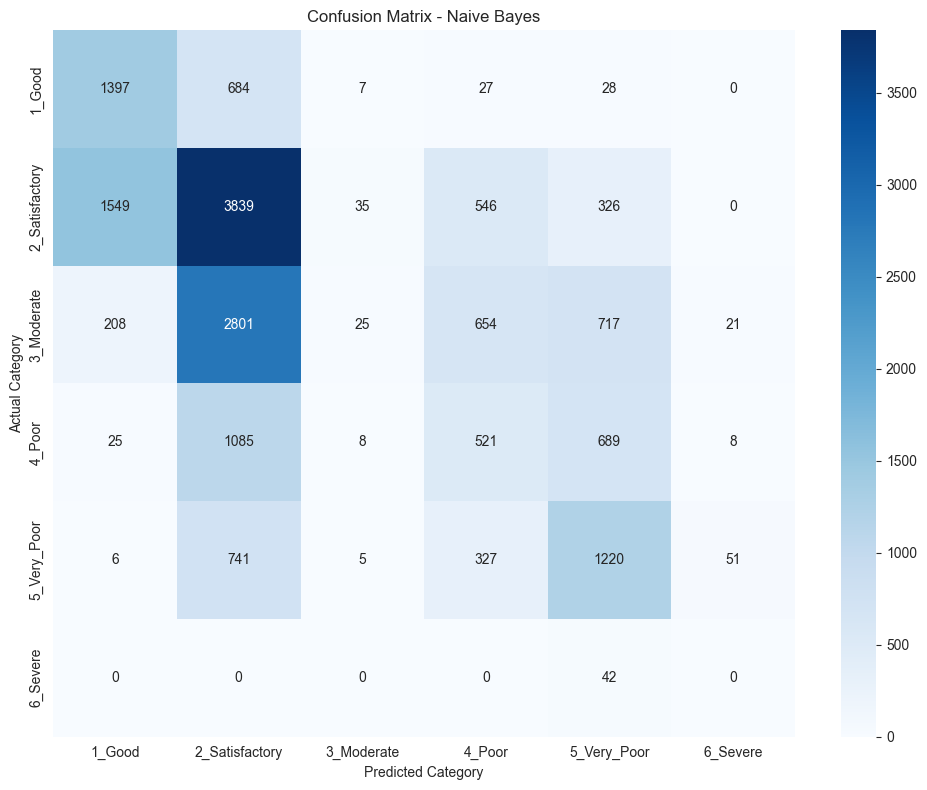


--- Predict pm2.5 for a future date (based on available dataset features) ---
Note: model predicts pm2.5 at DATE = features_time + 24 hours.
Looking for features at: 2025-11-29 00:00:00 (to predict pm2.5 at 2025-11-30 00:00:00)
No exact features for 2025-11-29 00:00:00. Using nearest previous available timestamp: 2025-11-13 23:00:00

--- Prediction Result ---
Features used from timestamp: 2025-11-13 23:00:00
Predicted category for pm2.5 at 2025-11-30 00:00:00: 5_Very_Poor
Predicted class probabilities:
  1_Good: 0.0000
  2_Satisfactory: 0.0000
  3_Moderate: 0.0000
  4_Poor: 0.4903
  5_Very_Poor: 0.5097
  6_Severe: 0.0000
Estimated numeric pm2.5 at 2025-11-30 00:00:00 (prob-weighted mean): 129.15 µg/m³
** Note: yeh numeric estimate classifier-based approach se nikala gaya hai (weighted mean of class-means). Agar aap strictly numeric regression chahte hain toh regression model (e.g. RandomForestRegressor) recommend karunga. **

--- Saving Model Files ---
SUCCESS: Naive Bayes model aur s

In [3]:
import pandas as pd
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # Model save karne ke liye
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

print("--- [Step 3] Naive Bayes Classification (TRAIN) Script Started ---")
warnings.filterwarnings('ignore', category=UserWarning)

# --- 1. Data Loading & Preprocessing ---
try:
    df_full = pd.read_csv('Rohtak_data_60_finalNEW.csv')
    print("CSV file successfully loaded.")
except FileNotFoundError:
    print("Error: 'Rohtak_data_60_finalNEW.csv' file nahi mili.")
    sys.exit()

print("\n--- Data Preprocessing ---")
df_full['time'] = pd.to_datetime(df_full['time'])
df_full.set_index('time', inplace=True)
df_full.replace([np.inf, -np.inf], np.nan, inplace=True)
df_full.ffill(inplace=True); df_full.bfill(inplace=True); df_full.fillna(0, inplace=True)
df_full['month'] = df_full.index.month
df_full['day_of_week'] = df_full.index.dayofweek
df_full['hour'] = df_full.index.hour
print("Preprocessing complete.")

# --- 2. Feature & Target Setup ---
selected_features = [
    'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'apparent_temperature',
    'pressure_msl', 'surface_pressure', 'vapor_pressure_deficit', 'precipitation',
    'cloudcover', 'shortwave_radiation', 'direct_radiation', 'diffuse_radiation',
    'windspeed_10m', 'winddirection_10m', 'windgusts_10m', 'et0_fao_evapotranspiration',
    'soil_temperature_0cm', 'soil_moisture_0_1cm', 'visibility', 'cape',
    'month', 'day_of_week', 'hour',
    'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide',
    'ozone', 'dust', 'ammonia'
]
missing_cols = [col for col in selected_features if col not in df_full.columns]
if missing_cols:
    print(f"!!! Warning: Missing features: {missing_cols}")
    # remove missing ones so selection doesn't fail
    selected_features = [col for col in selected_features if col not in missing_cols]

# Target is numeric pm2_5 24h later
X = df_full[selected_features].copy()
y_numeric = df_full['pm2_5'].shift(-24)  # numeric target 24h later
model_data = X.join(y_numeric.rename('target_pm2_5_24h_later'))
model_data.dropna(inplace=True)

X_full = model_data[selected_features]
y_full_numeric = model_data['target_pm2_5_24h_later']

# --- 3. Convert numeric target to categories (for Naive Bayes classifier) ---
print("\n--- Converting Target (y) to Categories ---")
bins = [-np.inf, 30, 60, 90, 120, 250, np.inf]
labels = ['1_Good', '2_Satisfactory', '3_Moderate', '4_Poor', '5_Very_Poor', '6_Severe']
y_full_class = pd.cut(y_full_numeric, bins=bins, labels=labels)
if y_full_class.isnull().any():
    y_full_class = y_full_class.cat.add_categories('0_Unknown').fillna('0_Unknown')
print("Target categories created.")

# --- 4. Train-Test Split (we split both numeric and class targets aligned) ---
X_train, X_test, y_train_class, y_test_class, y_train_numeric, y_test_numeric = train_test_split(
    X_full, y_full_class, y_full_numeric, test_size=0.2, shuffle=False
)
print(f"\nTraining set: {len(X_train)} samples")

# --- 5. Data Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data scaling complete.")

# --- 6. Model Training (Naive Bayes classifier on CATEGORIES) ---
print("\n--- [Step 3] Training Naive Bayes Classifier ---")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train_class)
print("Model training complete.")

# --- 7. Build mapping: for each class, what's the mean numeric pm2_5 in training set ---
# Ensure index alignment between y_train_class and y_train_numeric
y_train_numeric_series = pd.Series(y_train_numeric.values, index=y_train_class.index)
class_means = y_train_numeric_series.groupby(y_train_class).mean().to_dict()
global_mean_numeric = y_train_numeric_series.mean()
# Fill any missing class with global mean
for lbl in nb_model.classes_:
    if lbl not in class_means:
        class_means[lbl] = global_mean_numeric

# --- 8. Model Evaluation (classification) ---
print("\n--- Evaluating Naive Bayes (classification) ---")
y_pred_class = nb_model.predict(X_test_scaled)
print("\n--- Classification Report ---")
print(classification_report(y_test_class, y_pred_class))

print("\nShowing Graph: Confusion Matrix...")
cm = confusion_matrix(y_test_class, y_pred_class, labels=nb_model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.tight_layout()
plt.show()

# --- 9. Ask user for a FUTURE DATE and predict pm2.5 for that date ---
print("\n--- Predict pm2.5 for a future date (based on available dataset features) ---")
print("Note: model predicts pm2.5 at DATE = features_time + 24 hours.")
date_str = input("Enter the FUTURE date/time you want prediction for (e.g. '2025-11-20 15:00' or '2025-11-20'): ").strip()
try:
    target_date = pd.to_datetime(date_str)
except Exception as e:
    print(f"Date parsing error: {e}")
    sys.exit()

# To predict pm2_5 at target_date we need features at target_date - 24h (because model trained with shift(-24))
features_time = target_date - pd.Timedelta(hours=24)
print(f"Looking for features at: {features_time} (to predict pm2.5 at {target_date})")

# Find the row in df_full closest at-or-before features_time
if features_time in df_full.index:
    features_row = df_full.loc[features_time, selected_features]
    used_time = features_time
else:
    # get previous available timestamp (pad). If none available, abort with message.
    idx = df_full.index.get_indexer([features_time], method='pad')[0]
    if idx == -1:
        print("Sorry — dataset mein features_time se pehle koi record nahin mila. Prediction possible nahi hai.")
        sys.exit()
    used_time = df_full.index[idx]
    print(f"No exact features for {features_time}. Using nearest previous available timestamp: {used_time}")
    features_row = df_full.loc[used_time, selected_features]

# If features_row is a Series (single row) keep as is; if multiple rows (possible if index not unique),
# pick the first.
if isinstance(features_row, pd.DataFrame):
    features_row = features_row.iloc[0]

# Prepare feature vector, scale and predict
X_input = features_row[selected_features].values.reshape(1, -1)
X_input_scaled = scaler.transform(X_input)

pred_class = nb_model.predict(X_input_scaled)[0]
probs = None
if hasattr(nb_model, "predict_proba"):
    probs = nb_model.predict_proba(X_input_scaled)[0]
    # map classes to probabilities
    class_prob_map = dict(zip(nb_model.classes_, probs))
else:
    # fallback: we only have predicted class
    class_prob_map = {pred_class: 1.0}

# Compute expected numeric pm2.5 as weighted average of class_means
expected_pm25 = 0.0
for cls_idx, cls in enumerate(nb_model.classes_):
    prob = class_prob_map.get(cls, 0.0)
    mean_val = class_means.get(cls, global_mean_numeric)
    expected_pm25 += prob * mean_val

print("\n--- Prediction Result ---")
print(f"Features used from timestamp: {used_time}")
print(f"Predicted category for pm2.5 at {target_date}: {pred_class}")
if probs is not None:
    print("Predicted class probabilities:")
    for cls, p in class_prob_map.items():
        print(f"  {cls}: {p:.4f}")
print(f"Estimated numeric pm2.5 at {target_date} (prob-weighted mean): {expected_pm25:.2f} µg/m³")
print("** Note: yeh numeric estimate classifier-based approach se nikala gaya hai (weighted mean of class-means). Agar aap strictly numeric regression chahte hain toh regression model (e.g. RandomForestRegressor) recommend karunga. **")

# --- 10. Save model, scaler and metadata ---
print("\n--- Saving Model Files ---")
try:
    joblib.dump(nb_model, "nb_model.joblib")
    joblib.dump(scaler, "nb_scaler.joblib")
    joblib.dump(selected_features, "nb_features.joblib")
    joblib.dump(bins, "nb_bins.joblib")
    joblib.dump(labels, "nb_labels.joblib")
    joblib.dump(class_means, "nb_class_means.joblib")  # saved mapping for numeric estimation
    print("SUCCESS: Naive Bayes model aur scaler .joblib files mein save ho gaye.")
except Exception as e:
    print(f"Error saving files: {e}")

print("\n--- [Step 3] Naive Bayes (TRAIN) Script Finished ---")
  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sys

# --- 1. DATA LOAD KAREIN ---
print("Data loading and model training started.")
try:
    df = pd.read_csv('Rohtak_data_60_finalNEW.csv')
except FileNotFoundError:
    print("Error: 'Rohtak_data_60_finalNEW.csv' file nahi mili. Check karein file wahi rakhi hai jaha code hai.")
    sys.exit()

df['time'] = pd.to_datetime(df['time'])
df = df.dropna(subset=['pm2_5'])

# --- 2. CATEGORIES BANAYEIN ---
def get_quality(pm):
    if pm <= 30: return 'Good'
    elif pm <= 60: return 'Satisfactory'
    elif pm <= 90: return 'Moderate'
    elif pm <= 120: return 'Poor'
    elif pm <= 250: return 'Very Poor'
    else: return 'Severe'

df['pm2_5_quality'] = df['pm2_5'].apply(get_quality)

# --- 3. FEATURES TAYYAR KAREIN ---
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month
df['dayofweek'] = df['time'].dt.dayofweek
df['dayofyear'] = df['time'].dt.dayofyear

weather_cols = [
    'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'apparent_temperature',
    'pressure_msl', 'surface_pressure', 'vapor_pressure_deficit',
    'precipitation', 'rain', 'windspeed_10m', 'winddirection_10m'
]
time_cols = ['hour', 'month', 'dayofweek', 'dayofyear']

X = df[weather_cols + time_cols].fillna(0)
y = df['pm2_5_quality']

# --- 4. MODEL TRAIN KAREIN ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# High accuracy ke liye C=100 use kar rahe hain
svm_model = SVC(kernel='rbf', C=100, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Accuracy print karein
y_pred = svm_model.predict(X_test_scaled)
print(f"Model  Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("-" * 50)

# --- 5. USER INPUT (SIRF EK BAAR) ---
user_input = input("Enter a future date (Format: YYYY-MM-DD HH:MM:SS): ")

try:
    target_date = pd.to_datetime(user_input)
    
    # Input date se features nikalein
    hour = target_date.hour
    month = target_date.month
    dayofweek = target_date.dayofweek
    dayofyear = target_date.dayofyear
    
    # Us mahine/ghante ka average mausam uthayein
    mask = (df['month'] == month) & (df['hour'] == hour)
    if mask.sum() == 0:
        mask = (df['month'] == month)
    
    avg_weather = df.loc[mask, weather_cols].mean()
    
    # Data taiyar karein prediction ke liye
    features = avg_weather.to_dict()
    features.update({
        'hour': hour, 
        'month': month, 
        'dayofweek': dayofweek, 
        'dayofyear': dayofyear
    })
    
    feat_df = pd.DataFrame([features])
    feat_df = feat_df[weather_cols + time_cols] # Column order fix karein
    feat_scaled = scaler.transform(feat_df)
    
    # Predict karein
    prediction = svm_model.predict(feat_scaled)[0]
    
    print("\n" + "="*30)
    print(f"Date: {target_date}")
    print(f"Predicted Air Quality: {prediction}")
    print("="*30)
    print("Program Finished.")

except Exception as e:
    print(f"Error: Date format galat tha ya koi aur dikkat aayi. ({e})")
    print("Sahi format use karein: YYYY-MM-DD HH:MM:SS")

# Code yahan khatam, ab ye apne aap band ho jayega.

Data loading and model training started.
Model  Accuracy: 61.18%
--------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import sys

# --- 1. Load and Preprocess Data ---
file_path = 'Rohtak_data_60_finalNEW.csv'  # Make sure this file is in your folder
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please upload the file.")
    sys.exit()

# Convert time to datetime objects and sort
df['time'] = pd.to_datetime(df['time'])
data = df[['time', 'pm2_5']].dropna().sort_values('time')

# Use time as index
data_indexed = data.set_index('time')

# Scale the data (LSTM works best with values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
values = data_indexed['pm2_5'].values.reshape(-1, 1)
scaled_data = scaler.fit_transform(values)

# Helper function to create sequences (look back X hours to predict Y)
def create_dataset(dataset, look_back=24):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Hyperparameters
LOOK_BACK = 24   # Use past 24 hours to predict next hour
EPOCHS = 30      # Increased epochs for better accuracy
BATCH_SIZE = 64

# Create training sequences
X, y = create_dataset(scaled_data, LOOK_BACK)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into Train (80%) and Test (20%) sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- 2. Build and Train LSTM Model ---
print("Building and Training LSTM Model. Please wait...")
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(LOOK_BACK, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model (verbose=0 hides the epoch-by-epoch loop output)
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
print("Training Complete.")

# --- 3. Evaluate and Output Accuracy ---
# Predict on test data to check accuracy
test_predict = model.predict(X_test, verbose=0)

# Invert scaling to get actual PM2.5 values
test_predict_inv = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict_inv[:,0]))
r2 = r2_score(y_test_inv[0], test_predict_inv[:,0])

print("-" * 30)
print(f"MODEL ACCURACY REPORT")
print("-" * 30)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Accuracy (R2 Score): {r2 * 100:.2f}%")
print("-" * 30)

# --- 4. Prediction Logic for Future User Date ---
def get_aqi_category(pm25):
    if pm25 <= 30: return "Good"
    elif pm25 <= 60: return "Satisfactory"
    elif pm25 <= 90: return "Moderately Polluted"
    elif pm25 <= 120: return "Poor"
    elif pm25 <= 250: return "Very Poor"
    else: return "Severe"

# Get User Input
last_date = data_indexed.index[-1]
print(f"\nDataset ends on: {last_date}")
user_input = input("Enter the future date and time (Format: YYYY-MM-DD HH:MM:SS): ")

try:
    target_date = pd.to_datetime(user_input)
    
    if target_date <= last_date:
        print("Error: Please enter a date strictly after the dataset end date.")
    else:
        # Calculate hours difference
        delta = target_date - last_date
        hours_ahead = int(delta.total_seconds() / 3600)
        
        print(f"Predicting for {target_date} ({hours_ahead} hours from now)...")

        # Start with the last known sequence of data
        curr_seq = scaled_data[-LOOK_BACK:].reshape(1, LOOK_BACK, 1)
        predicted_val_scaled = 0

        # Recursive prediction loop (Output hidden as requested)
        for _ in range(hours_ahead):
            pred = model.predict(curr_seq, verbose=0)
            predicted_val_scaled = pred[0][0]
            
            # Update sequence for next step
            new_step = np.array([[[predicted_val_scaled]]])
            curr_seq = np.append(curr_seq[:, 1:, :], new_step, axis=1)

        # Final Result
        final_pm25 = scaler.inverse_transform([[predicted_val_scaled]])[0][0]
        aqi_status = get_aqi_category(final_pm25)

        print("\n" + "="*30)
        print(f"PREDICTION RESULTS")
        print("="*30)
        print(f"Target Date : {target_date}")
        print(f"Predicted PM2.5 : {final_pm25:.2f}")
        print(f"AQI Category    : {aqi_status}")
        print("="*30)

except ValueError:
    print("Invalid date format. Please use YYYY-MM-DD HH:MM:SS")

In [ ]:
import pandas as pd
import numpy as np
import datetime
import sys
import warnings
import os

# Suppress TensorFlow warnings for cleaner output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ==========================================
# 1. Data Loading and Preprocessing
# ==========================================
def load_and_process_data(file_path):
    print(f"Loading dataset: {file_path}...")
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        sys.exit()

    # Convert time to datetime objects
    df['time'] = pd.to_datetime(df['time'])
    
    # Drop rows where target 'pm2_5' is missing and sort by time
    df_target = df.dropna(subset=['pm2_5']).copy()
    df_target = df_target.sort_values('time')

    # --- Feature Engineering: Cyclical Time Features ---
    # This helps the model understand daily and yearly patterns (seasonality)
    df_target['hour'] = df_target['time'].dt.hour
    df_target['month'] = df_target['time'].dt.month
    
    # Convert hour/month to sin/cos signals
    df_target['hour_sin'] = np.sin(2 * np.pi * df_target['hour'] / 24)
    df_target['hour_cos'] = np.cos(2 * np.pi * df_target['hour'] / 24)
    df_target['month_sin'] = np.sin(2 * np.pi * df_target['month'] / 12)
    df_target['month_cos'] = np.cos(2 * np.pi * df_target['month'] / 12)

    return df_target

# ==========================================
# 2. Helper: Create Sequences for Time Series
# ==========================================
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        # Predict the PM2.5 value (index 0) at the next step
        y.append(data[i+seq_length, 0]) 
    return np.array(X), np.array(y)

# ==========================================
# 3. AQI Categorization Logic
# ==========================================
def get_aqi_category(pm25_value):
    if pm25_value <= 60:
        return "Low"
    elif pm25_value <= 120:
        return "Medium"
    else:
        return "High"

# ==========================================
# Main Execution
# ==========================================
if __name__ == "__main__":
    # --- Configuration ---
    FILE_PATH = 'Rohtak_data_60_finalNEW.csv'
    SEQ_LENGTH = 24  # Look back 24 hours to predict the next hour
    # Features: PM2.5 + 4 cyclical time features
    FEATURE_COLS = ['pm2_5', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
    
    # 1. Load Data
    df = load_and_process_data(FILE_PATH)
    data_values = df[FEATURE_COLS].values
    
    # 2. Scale Data (Normalization)
    # GRU models work best when data is between 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data_values)
    
    # 3. Split Data (Train 90% / Test 10%)
    train_size = int(len(data_scaled) * 0.9)
    train_data = data_scaled[:train_size]
    test_data = data_scaled[train_size:]
    
    X_train, y_train = create_sequences(train_data, SEQ_LENGTH)
    X_test, y_test = create_sequences(test_data, SEQ_LENGTH)
    
    # 4. Build and Train GRU Model
    print("\nTraining GRU Model... (This may take a few minutes)")
    model = Sequential()
    model.add(GRU(64, return_sequences=True, input_shape=(SEQ_LENGTH, len(FEATURE_COLS))))
    model.add(Dropout(0.2))
    model.add(GRU(32))
    model.add(Dropout(0.2))
    model.add(Dense(1)) # Output layer for regression
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    # Training
    model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.1, verbose=1)
    
    # 5. Evaluate and Print Accuracy
    print("\n" + "="*40)
    print("   MODEL ACCURACY REPORT")
    print("="*40)
    
    # Predict on test set
    y_pred_scaled = model.predict(X_test, verbose=0)
    
    # Inverse transform to get real PM2.5 values
    # We need a dummy array because scaler expects 5 columns, we only have 1 (predictions)
    def inverse_transform_col(y_scaled, scaler):
        dummy = np.zeros((len(y_scaled), len(FEATURE_COLS)))
        dummy[:, 0] = y_scaled.flatten()
        return scaler.inverse_transform(dummy)[:, 0]
        
    y_pred_real = inverse_transform_col(y_pred_scaled, scaler)
    y_test_real = inverse_transform_col(y_test.reshape(-1, 1), scaler)
    
    # Calculate Metrics
    r2 = r2_score(y_test_real, y_pred_real)
    rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
    mae = mean_absolute_error(y_test_real, y_pred_real)
    
    print(f"R2 Score       : {r2:.4f} (Closer to 1.0 is better)")
    print(f"RMSE           : {rmse:.2f}")
    print(f"MAE            : {mae:.2f}")
    print("="*40 + "\n")

    # 6. User Input and Future Prediction
    print("Data loaded up to:", df['time'].iloc[-1])
    
    while True:
        user_input = input("Enter a future date (YYYY-MM-DD HH:MM:SS) or 'exit': ")
        
        if user_input.lower() == 'exit':
            print("Exiting program.")
            break
            
        try:
            target_date = pd.to_datetime(user_input)
            last_known_time = df['time'].iloc[-1]
            
            if target_date <= last_known_time:
                print(f"Error: Date must be after the last known data point ({last_known_time}).")
                continue
                
            print(f"Predicting AQI for {target_date}...")
            print("(Calculating step-by-step... output suppressed)")
            
            # --- Prediction Loop ---
            # Start with the very last sequence from our real data
            current_seq = data_scaled[-SEQ_LENGTH:].copy()
            current_time = last_known_time
            
            # Iterate hour by hour until we reach target date
            while current_time < target_date:
                current_time += datetime.timedelta(hours=1)
                
                # 1. Predict next PM2.5 value
                # Reshape to (1, 24, 5)
                input_seq = current_seq.reshape(1, SEQ_LENGTH, len(FEATURE_COLS))
                
                # VERBOSE=0 ensures NO output inside this loop
                pred_scaled_val = model.predict(input_seq, verbose=0)[0][0]
                
                # 2. Calculate time features for this new predicted timestamp
                h_sin = np.sin(2 * np.pi * current_time.hour / 24)
                h_cos = np.cos(2 * np.pi * current_time.hour / 24)
                m_sin = np.sin(2 * np.pi * current_time.month / 12)
                m_cos = np.cos(2 * np.pi * current_time.month / 12)
                
                # 3. Update the sequence window
                # Create new row: [pred_pm25, time_features...]
                new_row = np.array([pred_scaled_val, h_sin, h_cos, m_sin, m_cos])
                
                # Drop oldest record, add new record
                current_seq = np.vstack([current_seq[1:], new_row])
            
            # --- Final Result ---
            # Extract the final predicted scaled PM2.5 value
            final_pred_scaled = current_seq[-1, 0]
            
            # Inverse transform to get original scale
            dummy_row = np.zeros((1, len(FEATURE_COLS)))
            dummy_row[0, 0] = final_pred_scaled
            final_pm25 = scaler.inverse_transform(dummy_row)[0, 0]
            
            # Get AQI Category
            aqi_cat = get_aqi_category(final_pm25)
            
            print("\n" + "-"*30)
            print("PREDICTION RESULT")
            print("-" * 30)
            print(f"Date           : {target_date}")
            print(f"Predicted PM2.5: {final_pm25:.2f}")
            print(f"AQI Level      : {aqi_cat}")
            print("-" * 30 + "\n")
            
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD HH:MM:SS")
        except Exception as e:
            print(f"An error occurred: {e}")